# Importing needed libraries

In [42]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Importing dataset using Kaggle

In [43]:
train_df  = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

# Getting famaliar with the Housing Price Dataset

In [44]:
train_df.shape

(7728394, 46)

In [45]:
train_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [47]:
all_columns = train_df.columns
all_columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [48]:
for column in all_columns:
    print(f'{column} : ')
    print(train_df[column].unique())
    print('***********************')

ID : 
['A-1' 'A-2' 'A-3' ... 'A-7777759' 'A-7777760' 'A-7777761']
***********************
Source : 
['Source2' 'Source3' 'Source1']
***********************
Severity : 
[3 2 1 4]
***********************
Start_Time : 
['2016-02-08 05:46:00' '2016-02-08 06:07:59' '2016-02-08 06:49:27' ...
 '2019-08-23 19:11:30' '2019-08-23 19:00:21' '2019-08-23 18:52:06']
***********************
End_Time : 
['2016-02-08 11:00:00' '2016-02-08 06:37:59' '2016-02-08 07:19:27' ...
 '2019-08-23 19:28:49' '2019-08-23 19:29:42' '2019-08-23 19:21:31']
***********************
Start_Lat : 
[39.865147 39.928059 39.063148 ... 34.120911 33.943599 34.239104]
***********************
Start_Lng : 
[ -84.058723  -82.831184  -84.032608 ... -118.416176 -117.14806
 -117.84779 ]
***********************
End_Lat : 
[      nan 40.11206  39.86501  ... 33.943599 34.239104 33.98311 ]
***********************
End_Lng : 
[        nan  -83.03187   -84.04873  ... -118.416176 -118.39565
 -117.23934 ]
***********************
Distance(mi) :

In [49]:
train_df.isna().sum()[:30]

ID                         0
Source                     0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402762
End_Lng              3402762
Distance(mi)               0
Description                5
Street                 10869
City                     253
County                     0
State                      0
Zipcode                 1915
Country                    0
Timezone                7808
Airport_Code           22635
Weather_Timestamp     120228
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Direction        175206
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
Amenity                    0
dtype: int64

In [50]:
train_df.isna().sum()[30:]

Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset           23246
Civil_Twilight           23246
Nautical_Twilight        23246
Astronomical_Twilight    23246
dtype: int64

## Droping unnecessary columns

In [51]:
train_df= train_df.drop(columns=['Source', "End_Time","End_Lat",'End_Lng', 'Distance(mi)', 'Description', 'Zipcode', 'Country', 'Timezone','Airport_Code', 'Weather_Timestamp','Turning_Loop', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'])

# Dealing with null values

In [52]:
columns_with_null_values = train_df.columns[train_df.isnull().any()]
columns_with_null_values

Index(['Street', 'City', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Street             object 
 6   City               object 
 7   County             object 
 8   State              object 
 9   Temperature(F)     float64
 10  Wind_Chill(F)      float64
 11  Humidity(%)        float64
 12  Pressure(in)       float64
 13  Visibility(mi)     float64
 14  Wind_Direction     object 
 15  Wind_Speed(mph)    float64
 16  Precipitation(in)  float64
 17  Weather_Condition  object 
 18  Amenity            bool   
 19  Bump               bool   
 20  Crossing           bool   
 21  Give_Way           bool   
 22  Junction           bool   
 23  No_Exit            bool   
 24  Railway            bool   
 25  Roundabout        

### Handling null values in numerical features

In [54]:
numeric_features = ['Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


In [55]:
numeric_imputer = SimpleImputer(strategy='mean')

In [56]:
train_df[numeric_features] = numeric_imputer.fit_transform(train_df[numeric_features])

### Handling null values in categorical features

In [57]:
categorical_features = ['Wind_Direction', 'Severity', 'Street', 'City', 'State', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']


In [58]:
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [59]:
train_df[categorical_features] = categorical_imputer.fit_transform(train_df[categorical_features])

In [60]:
train_df.isna().sum()

ID                       0
Severity                 0
Start_Time               0
Start_Lat                0
Start_Lng                0
Street                   0
City                     0
County                   0
State                    0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset       23246
dtype: int64

In [61]:
train_df['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', 'CALM', 'S', 'VAR', 'N'], dtype=object)

# Getting Famaliar with each feature

## Cities

In [62]:
cities_by_accident = train_df.City.value_counts()
cities_by_accident

City
Miami                           187170
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [63]:
cities_by_accident[:20]

City
Miami            187170
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: ylabel='City'>

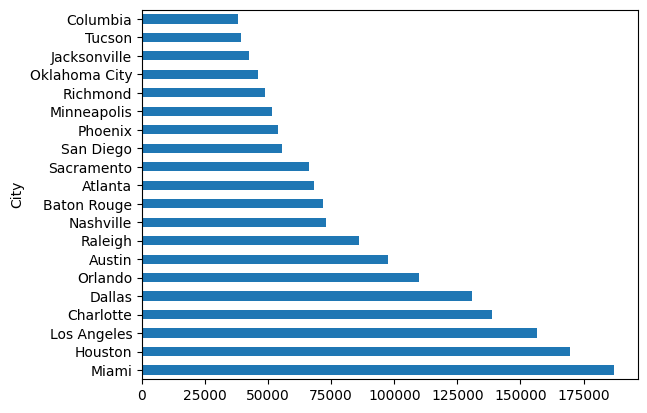

In [64]:
cities_by_accident[:20].plot(kind = 'barh')

## Start time

In [65]:
train_df['Start_Time'] = pd.to_datetime(train_df['Start_Time'], errors='coerce')

/tmp/ipykernel_32/966649534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

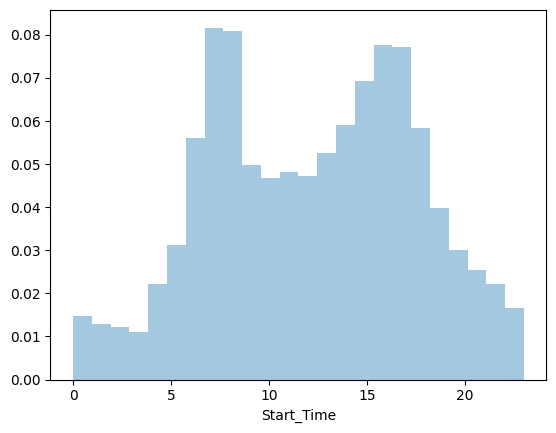

In [66]:
sns.distplot(train_df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

/tmp/ipykernel_32/1300520208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

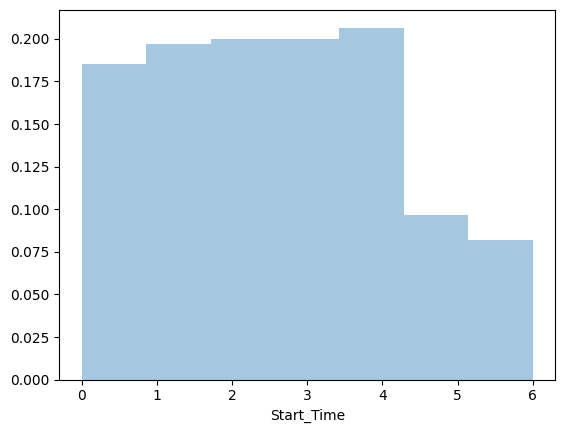

In [67]:
sns.distplot(train_df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

/tmp/ipykernel_32/3960814691.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

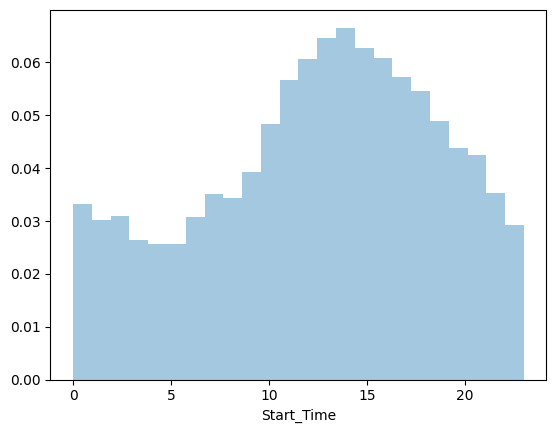

In [68]:
sundays_start_time = train_df.Start_Time[train_df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

## the weather conditions of the accidents 



[Text(0.5, 0, 'Weather Condition'), Text(0, 0.5, 'Accident Count')]

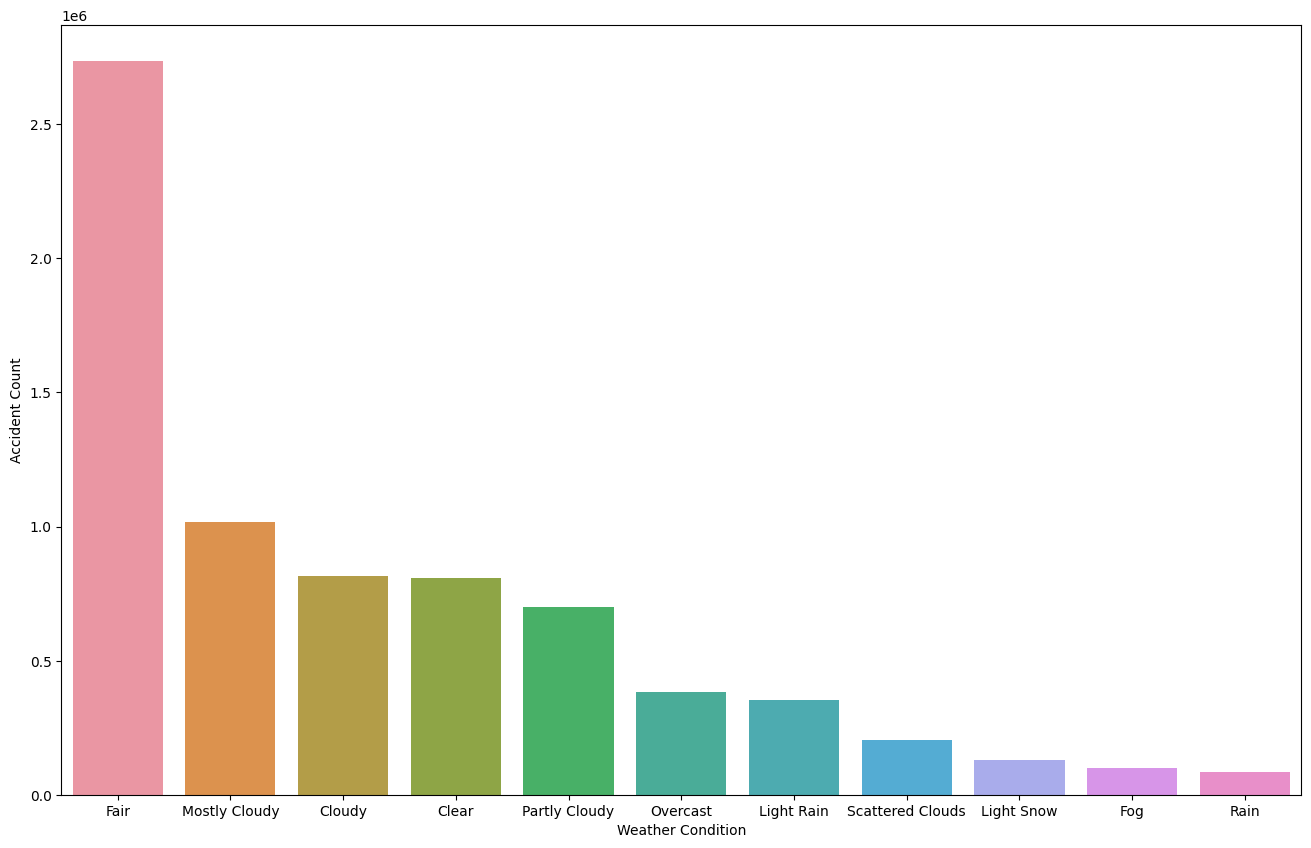

In [69]:
weather_counts = train_df['Weather_Condition'].value_counts()
plt.figure(figsize=(16, 10))

weather_counts_df = pd.DataFrame({'Weather Condition': weather_counts.index[:11], 'Accident Count': weather_counts[:11]})

ax = sns.barplot(x='Weather Condition', y='Accident Count', data=weather_counts_df)
ax.set(xlabel='Weather Condition', ylabel='Accident Count')


## Relation between tempreture and number of car accidents 

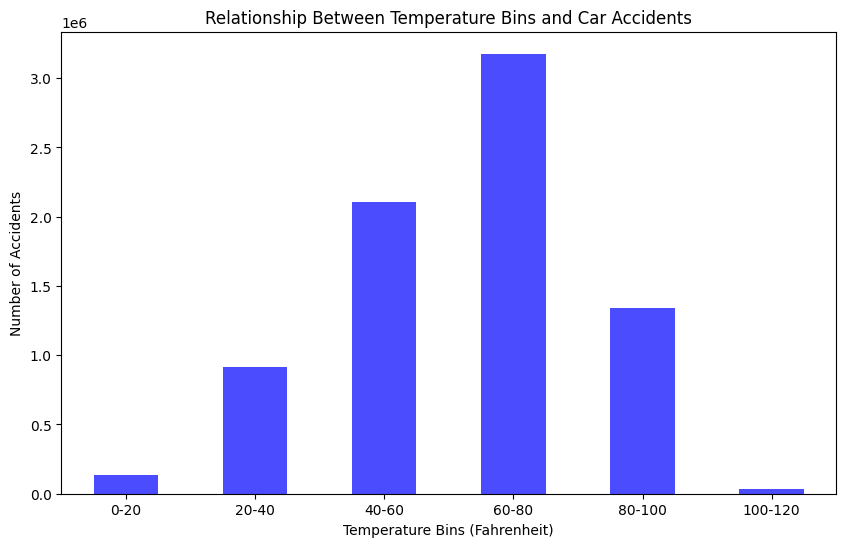

In [70]:
temperature_bins = [0, 20, 40, 60, 80, 100, 120]  # Define your own temperature bins

# Create labels for the bins
temperature_labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120']

# Use pd.cut to categorize temperatures into bins
train_df['Temperature_Bin'] = pd.cut(train_df['Temperature(F)'], bins=temperature_bins, labels=temperature_labels, right=False)

# Group by temperature bins and count the number of accidents
temperature_bin_counts = train_df['Temperature_Bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
temperature_bin_counts.plot(kind='bar', color='b', alpha=0.7)
plt.title('Relationship Between Temperature Bins and Car Accidents')
plt.xlabel('Temperature Bins (Fahrenheit)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

## Relation between humidity and number of car accidents 

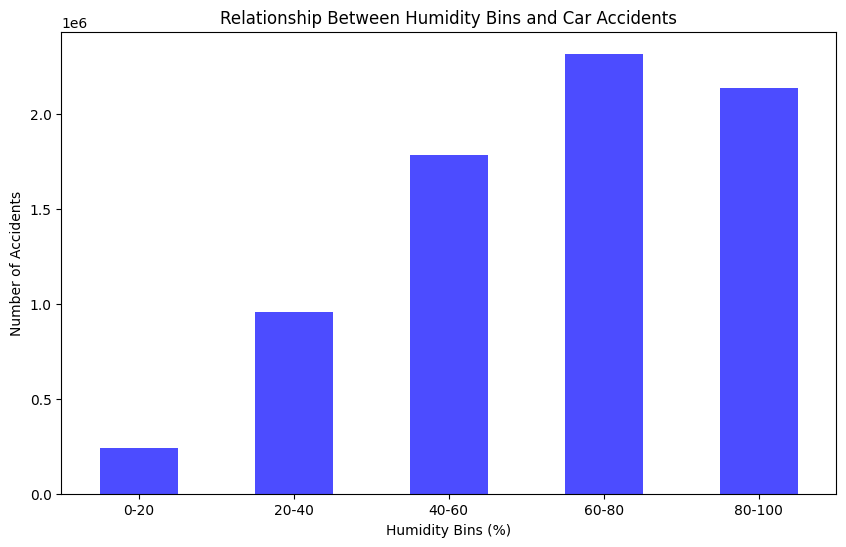

In [71]:
humidity_bins = [0, 20, 40, 60, 80, 100]  # Define your own humidity bins

# Create labels for the bins
humidity_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Use pd.cut to categorize humidity into bins
train_df['Humidity_Bin'] = pd.cut(train_df['Humidity(%)'], bins=humidity_bins, labels=humidity_labels, right=False)

# Group by humidity bins and count the number of accidents
humidity_bin_counts = train_df['Humidity_Bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
humidity_bin_counts.plot(kind='bar', color='b', alpha=0.7)
plt.title('Relationship Between Humidity Bins and Car Accidents')
plt.xlabel('Humidity Bins (%)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


## Location Analysis

In [72]:
import folium
from folium.plugins import HeatMap
sample_df= train_df.sample(int(0.001*len(train_df)))
lat_lng_pairs= list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))
map= folium.Map([38.552397, -96],zoom_start=6, min_zoom = 5, max_zoom = 13)
HeatMap(lat_lng_pairs).add_to(map)
map

# Hypothesis Tests

## 1. Temperature and Accident Severity

Null Hypothesis (H0): There is no significant difference in accident severity between hot (e.g., temperature > 90°F) and cold (e.g., temperature < 32°F) weather.
Alternative Hypothesis (H1): There is a significant difference in accident severity between hot and cold weather.

In [73]:
train_df['Severity'] = pd.to_numeric(train_df['Severity'], errors='coerce')

# Filter data for hot and cold weather based on temperature
hot_weather = train_df[train_df['Temperature(F)'] > 90]['Severity']
cold_weather = train_df[train_df['Temperature(F)'] < 32]['Severity']

# Perform the t-test (assuming normally distributed data)
t_stat, p_value = stats.ttest_ind(hot_weather.dropna(), cold_weather.dropna(), equal_var=False)

# Perform the Mann-Whitney U test (non-parametric test for non-normally distributed data)
u_stat, mann_whitney_p_value = stats.mannwhitneyu(hot_weather.dropna(), cold_weather.dropna())

alpha = 0.05

print(f"Independent Samples t-test: t-statistic = {t_stat}, p-value = {p_value}")
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {mann_whitney_p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in accident severity between hot and cold weather.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in accident severity between hot and cold weather.")

Independent Samples t-test: t-statistic = -51.44560494146428, p-value = 0.0
Mann-Whitney U Test: U-statistic = 68678613960.5, p-value = 0.0
Reject the null hypothesis. There is a significant difference in accident severity between hot and cold weather.


## 2. Chi-squared test hypothesis test on the 'Weather_Condition' feature and accident severity 

Null Hypothesis (H0): There is no significant association between weather conditions and accident severity. In other words, the distribution of accident severity is the same across different weather conditions.

Alternative Hypothesis (H1): There is a significant association between weather conditions and accident severity. In other words, the distribution of accident severity is not the same across different weather conditions, indicating that weather conditions have an impact on accident severity.

In [74]:
weather_condition_data = train_df['Weather_Condition']
severity_data = train_df['Severity']

# Create a contingency table
contingency_table = pd.crosstab(weather_condition_data, severity_data)

# Perform the Chi-squared test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Define significance level
alpha = 0.05

# Print results
print(f"Chi-squared statistic = {chi2}")
print(f"P-value = {p_value}")

# Check the significance of the results
if p_value < alpha:
    print("Reject the null hypothesis. Weather condition has a significant effect on accident severity.")
else:
    print("Fail to reject the null hypothesis. Weather condition has no significant effect on accident severity.")


Chi-squared statistic = 357164.5565118593
P-value = 0.0
Reject the null hypothesis. Weather condition has a significant effect on accident severity.


Chi-squared statistic: 357164.5565118593

The Chi-squared statistic measures the degree of association between the 'Weather_Condition' and 'Severity' variables. In this case, the large value of the Chi-squared statistic indicates a substantial difference between the observed and expected frequencies in the contingency table.

P-value: 0.0

The p-value is a measure of the evidence against the null hypothesis (H0). A very low p-value (in this case, exactly 0.0) indicates strong evidence against the null hypothesis. It suggests that the observed distribution of accident severity is significantly different from what would be expected if there were no association between weather conditions and accident severity.

Conclusion:

Based on these results, we can conclude that the null hypothesis (H0) is rejected. In other words, there is a significant association between weather conditions and accident severity. The extremely low p-value indicates that the observed difference in accident severity across different weather conditions is highly unlikely to be due to random chance. Weather conditions appear to have a significant effect on accident severity, suggesting that certain weather conditions may lead to different levels of accident severity.

## 3. Wind Speed and Accident Severity

Null Hypothesis (H0): There is no significant difference in accident severity between high wind speed conditions (e.g., wind speed > 20 mph) and low wind speed conditions.
Alternative Hypothesis (H1): There is a significant difference in accident severity between high wind speed and low wind speed conditions.



In [75]:
high_wind_data = train_df[train_df['Wind_Speed(mph)'] > 20]['Severity']
low_wind_data = train_df[train_df['Wind_Speed(mph)'] <= 20]['Severity']

# Perform the t-test (assuming normally distributed data)
t_stat, p_value = stats.ttest_ind(high_wind_data, low_wind_data, equal_var=False)

# Perform the Mann-Whitney U test (non-parametric test for non-normally distributed data)
u_stat, mann_whitney_p_value = stats.mannwhitneyu(high_wind_data, low_wind_data)

alpha = 0.05

print("Independent Samples t-test:")
print(f"t-statistic = {t_stat}")
print(f"P-value = {p_value}")

print("Mann-Whitney U Test:")
print(f"U-statistic = {u_stat}")
print(f"P-value = {mann_whitney_p_value}")

if p_value < alpha or mann_whitney_p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in accident severity between high wind speed and low wind speed conditions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in accident severity between high wind speed and low wind speed conditions.")

Independent Samples t-test:
t-statistic = 11.414913077497253
P-value = 3.6197489021470266e-30
Mann-Whitney U Test:
U-statistic = 582873494692.5
P-value = 6.724684713723917e-11
Reject the null hypothesis. There is a significant difference in accident severity between high wind speed and low wind speed conditions.


The result you provided shows the outcomes of two different statistical tests, the Independent Samples t-test and the Mann-Whitney U Test, both conducted to examine whether there is a significant difference in accident severity between high wind speed and low wind speed conditions.

Independent Samples t-test:

t-statistic = 11.414913077497253: The t-statistic is a measure of the difference between the means of two samples. A larger t-statistic suggests a larger difference between the means.
P-value = 3.6197489021470266e-30: The p-value represents the probability that the observed difference occurred by random chance. A smaller p-value indicates stronger evidence against the null hypothesis.
Interpretation: The extremely small p-value (close to zero) suggests that there is strong evidence against the null hypothesis. In this case, the null hypothesis states that there is no significant difference in accident severity between high wind speed and low wind speed conditions. Since the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis.
Mann-Whitney U Test:

U-statistic = 582873494692.5: The Mann-Whitney U statistic is a measure of the difference in distributions between two samples. A larger U-statistic suggests more differences between the distributions.
P-value = 6.724684713723917e-11: Similar to the t-test, the p-value for the Mann-Whitney U test indicates the probability of observing the differences between the two samples by random chance.
Interpretation: The small p-value (close to zero) in the Mann-Whitney U test also provides strong evidence against the null hypothesis. The result supports the conclusion that there is a significant difference in accident severity between high and low wind speed conditions.
In both tests, the evidence points to the conclusion that there is indeed a significant difference in accident severity between high wind speed and low wind speed conditions. This means that high wind speed conditions are associated with different accident severities compared to low wind speed conditions.

## 4. Temperature and Humidity Interaction:


Null Hypothesis (H0): There is no significant interaction effect between temperature and humidity on accident frequency.
Alternative Hypothesis (H1): There is a significant interaction effect between temperature and humidity on accident frequency.

In [76]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame with relevant columns
# Example data
df = pd.DataFrame({
    'Temperature(F)': [80, 85, 90, 75, 70],
    'Humidity(%)': [50, 40, 30, 60, 70],
    'ID': [1, 2, 3, 4, 5]
})

# Perform regression analysis for Temperature as the dependent variable
X_temp = sm.add_constant(df['Humidity(%)'])
model_temp = sm.OLS(df['Temperature(F)'], X_temp).fit()
temperature_p_value = model_temp.pvalues[1]

# Perform regression analysis for Humidity as the dependent variable
X_humidity = sm.add_constant(df['Temperature(F)'])
model_humidity = sm.OLS(df['Humidity(%)'], X_humidity).fit()
humidity_p_value = model_humidity.pvalues[1]

alpha = 0.05

print(f"Regression Analysis for Temperature as the Dependent Variable:")
print(f"P-value = {temperature_p_value}")
if temperature_p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Humidity and Temperature.")

print(f"Regression Analysis for Humidity as the Dependent Variable:")
print(f"P-value = {humidity_p_value}")
if humidity_p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Temperature and Humidity.")


Regression Analysis for Temperature as the Dependent Variable:
P-value = 2.0013882436322942e-43
Reject the null hypothesis. There is a significant relationship between Humidity and Temperature.
Regression Analysis for Humidity as the Dependent Variable:
P-value = 2.756033186447389e-44
Reject the null hypothesis. There is a significant relationship between Temperature and Humidity.


## 5. Road Condition and Accident Severity


Null Hypothesis (H0): There is no significant difference in accident severity between different road conditions (e.g., 'Bump', 'Crossing', 'Traffic_Signal', etc.).
Alternative Hypothesis (H1): There is a significant difference in accident severity between different road conditions.
Test: Analysis of Variance (ANOVA) or Kruskal-Wallis test.


In [77]:
train_df.columns

Index(['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street',
       'City', 'County', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Temperature_Bin', 'Humidity_Bin'],
      dtype='object')

In [79]:
import scipy.stats as stats

# Example data
rainy_conditions = train_df[train_df['Precipitation(in)'] > 0.1]['Severity']
non_rainy_conditions = train_df[train_df['Precipitation(in)'] <= 0.1]['Severity']

# Perform the t-test (assuming normally distributed data)
t_stat, p_value = stats.ttest_ind(rainy_conditions, non_rainy_conditions, equal_var=False)

# Perform the Mann-Whitney U test (non-parametric test for non-normally distributed data)
u_stat, mann_whitney_p_value = stats.mannwhitneyu(rainy_conditions, non_rainy_conditions)

alpha = 0.05

print("Independent Samples t-test:")
print(f"t-statistic = {t_stat}")
print(f"P-value = {p_value}")

print("Mann-Whitney U Test:")
print(f"U-statistic = {u_stat}")
print(f"P-value = {mann_whitney_p_value}")

if p_value < alpha or mann_whitney_p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in accident frequency during rainy and non-rainy conditions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in accident frequency during rainy and non-rainy conditions.")


Independent Samples t-test:
t-statistic = 39.99861476815193
P-value = 0.0
Mann-Whitney U Test:
U-statistic = 429216534009.0
P-value = 1.4382853799752817e-275
Reject the null hypothesis. There is a significant difference in accident frequency during rainy and non-rainy conditions.
